In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mta = pd.read_csv('mta_clean.zip', parse_dates=['date', 'timestamp'], low_memory=False)

In [3]:
def timeperiod(time):
    time = dt.datetime.strptime(time, '%H:%M:%S').time()
    if time >= dt.time(0,0,0) and time < dt.time(4,0,0):
        return "12am-4am"
    elif time >= dt.time(4,0,0) and time < dt.time(8,0,0):
        return "4am-8am"
    elif time >= dt.time(8,0,0) and time < dt.time(12,0,0):
        return "8am-12pm"
    elif time >= dt.time(12,0,0) and time < dt.time(16,0,0):
        return "12pm-4pm"
    elif time >= dt.time(16,0,0) and time < dt.time(20,0,0):
        return "4pm-8pm"
    else:
        return "8pm-12am"
    
mta['time_period'] = mta['time'].apply(timeperiod)

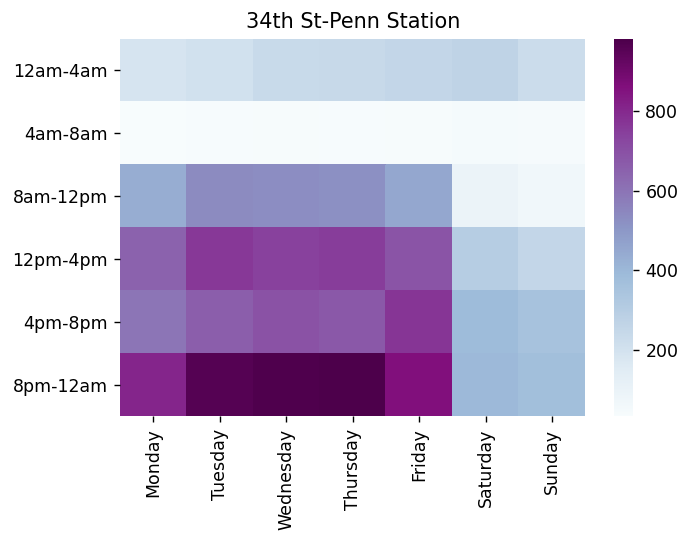

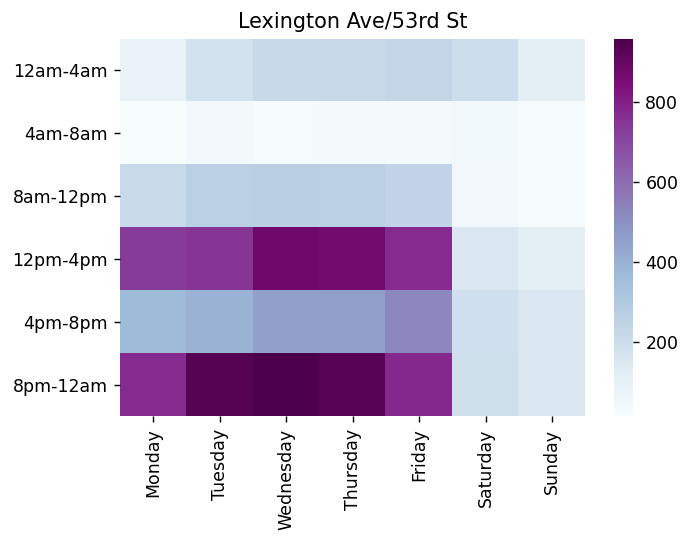

In [100]:
station_heatplot = mta[mta['station'] == '34 ST-PENN STA'].groupby(['time_period','weekday'])['total'].mean()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])
fig, ax = plt.subplots(1, 1, dpi=125)
sns.heatmap(station_heatplot,cmap='BuPu');
ax.set_ylabel('')    
ax.set_xlabel('');
ax.set_title('34th St-Penn Station')
plt.show()

station_heatplot = mta[mta['station'] == 'LEXINGTON AV/53'].groupby(['time_period','weekday'])['total'].mean()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])
fig, ax = plt.subplots(1, 1, dpi=125)
sns.heatmap(station_heatplot,cmap='BuPu');
ax.set_ylabel('')    
ax.set_xlabel('');
ax.set_title('Lexington Ave/53rd St')
plt.show()